<a href="https://colab.research.google.com/github/Anshuman-37/Summer_Dissertation/blob/main/Registered_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FSL Installation and Kaggle Prerequisties

In [1]:
# ## On Average Takes around 16 minutes 
import os
!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py
 
fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!. ${FSLDIR}/etc/fslconf/fsl.sh

!flirt -version 

Checking FSL package
[OK] File downloaded
Installing FSL software version 6.0.5.2...
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-[OK] FSL software installed.
\|Performing post install tasks
/Stage 1
By installing this python distribution you agree to the license terms in
/usr/local/fsl/fslpython/LICENSE.txt
100%
Stage 2
100%
/tmp/fsl

In [2]:
## Upload your kaggle.json file that can be downloaded from kaggle account
## Takes a bit time to read the kaggle.json file Run twice if it didn't found it
!pip install kaggle --upgrade
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir content/data
!kaggle datasets download -d lyfeisgood/something-bigger
!unzip /content/something-bigger.zip -d data_new
!pip install regtricks
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
mkdir: cannot create directory ‘content/data’: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open /content/something-bigger.zip, /content/something-bigger.zip.zip or /content/something-bigger.zip.ZIP.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.

#### Header Files

In [3]:
### Common Libraries
import os
import re
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

### Misc. 
import regtricks as rt

### Torch Files 
import torch
print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from torchsummary import summary

## Import my .py file ....... 
import Data_Loader as dl
import Models as model
import Prediction as pd


1.12.0+cu113
True
1.12.0+cu113
True
cuda:0
1.12.0+cu113
True


#### 2D convolution

##### Data Loading

In [ ]:
# Take around 10 minutes
## Defining the path of the data 
x,y = dl.data_loader_2D('/content/data_new','/content/data_new',55,device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)

train_x , train_y , test_x , test_y = dl.data_split(x,y,0.2)

print('\nDimensions of Train Test Data (MRI) ->',end=' ');      dl.print_data_dimension(train_x) ; dl.print_data_dimension(test_x);
print('\nDimensions of Train Test Data (ASL Data) ->',end=' '); dl.print_data_dimension(train_y) ; dl.print_data_dimension(test_y);

##### Model Training

In [ ]:
## Training the model
train_loss, test_loss, predictions = model.train_conv_2D(100,4,train_x,train_y,test_x,test_y,85)
print('Test Loss ',test_loss); print('Predictions shape', predictions.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 340, 91, 109]           3,400
       BatchNorm2d-2         [-1, 340, 91, 109]             680
              ReLU-3         [-1, 340, 91, 109]               0
         MaxPool2d-4         [-1, 340, 91, 109]               0
            Conv2d-5         [-1, 680, 91, 109]       2,081,480
       BatchNorm2d-6         [-1, 680, 91, 109]           1,360
              ReLU-7         [-1, 680, 91, 109]               0
         MaxPool2d-8         [-1, 680, 91, 109]               0
            Conv2d-9        [-1, 1360, 91, 109]       8,324,560
      BatchNorm2d-10        [-1, 1360, 91, 109]           2,720
             ReLU-11        [-1, 1360, 91, 109]               0
        MaxPool2d-12        [-1, 1360, 91, 109]               0
           Conv2d-13         [-1, 680, 91, 109]       8,323,880
      BatchNorm2d-14         [-1, 680, 

  1%|          | 1/101 [00:02<04:23,  2.64s/it]

0.12716375
1180.8779296875


 26%|██▌       | 26/101 [01:08<03:18,  2.65s/it]

0.010023583
1180.8779296875


 50%|█████     | 51/101 [02:15<02:12,  2.65s/it]

0.0057789176
1180.8779296875


 75%|███████▌  | 76/101 [03:21<01:06,  2.65s/it]

0.007985573
1180.8779296875


100%|██████████| 101/101 [04:27<00:00,  2.65s/it]

0.007889616
1181.59716796875
Test Loss  

tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward0>)
Predictions shape torch.Size([4, 1, 91, 109])


##### Results and Plots

(1, 91, 109, 91)
<class 'numpy.ndarray'>
(4, 1, 91, 109, 91)
<class 'numpy.ndarray'>


TypeError: ignored

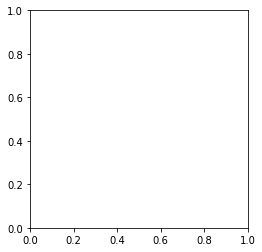

In [ ]:
#pd.predictions_2D(test_y,predictions,3)
def plot_residuals_2D(y_target,y_predicted,sample_number):
    y_p = y_predicted[sample_number]
    y = y_target.cpu().detach().numpy()
    y_p = y_p.cpu().detach().numpy()
    print(y_p.shape); print(type(y_p))
    print(y.shape); print(type(y))

    plt.imshow((y[sample_number][0,:,:]-y_p[0,:,:])**2,cmap = 'gray'); plt.show();
plot_residuals_2D(test_y,predictions,3)

#### MISC

In [ ]:
print((torch.cuda.memory_allocated())/(1024*1024));
!nvidia-smi

841.10107421875
Sat Jul 30 17:07:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    36W / 250W |   7315MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                        

In [ ]:
torch.cuda.empty_cache()
dl.print_data_shape(predictions[0])

torch.Size([1, 91, 109])
torch.Size([1, 91, 109])
torch.Size([1, 91, 109])
torch.Size([1, 91, 109])


(1, 91, 109, 91)
<class 'numpy.ndarray'>


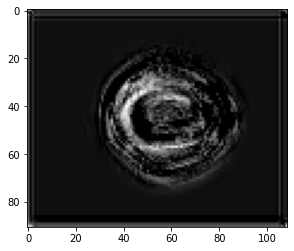

In [ ]:
# x_first = predictions[0][0]
# pred_np = x_first.cpu().detach().numpy()
# dl.print_data_dimension(pred_np); print(type(pred_np))

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.animation as animation

# img = [] # some array of images
# frames = [] # for storing the generated images
# fig = plt.figure()
# for i in range(0,x.shape[4]):
#     ## For L2 Distance
#     frames.append([plt.imshow(pred_np[0,:,:,i], cmap=cm.Greys_r,animated=True)])
# ani = animation.ArtistAnimation(fig, frames, interval=120, blit=True, repeat_delay=1000)
# ani.save('movie.mp4')


#### 3D convolution

##### Data Loading

In [ ]:
# Takes approximately 10 minutes 
x,y = dl.data_loader_3D('/content/data_new','/content/data_new',device)

## Printing the shape of specifid data
print('\nShape of MRI images - >');     dl.print_data_shape(x); 
print('\nShape of ASL images - >');     dl.print_data_shape(y);

## Printing the Stats of the data
print('\nStats for MRI data(X) - >');   dl.tensor_stats(x); 
print('\nStats for ASL data(X) - >');   dl.tensor_stats(y);

## Printing the Dimension of X and Y  
## Dimension refer -> Number x Length x Breadth x Height x Channel
print('\nDimensions of X(MRI Data) ->',end=' '); dl.print_data_dimension(x)
print('\nDimensions of Y(ASL Data) ->',end=' '); dl.print_data_dimension(y)

train_x , train_y , test_x , test_y = dl.data_split(x,y,0.2)

print('\nDimensions of Train Test Data (MRI) ->',end=' ');      dl.print_data_dimension(train_x) ; dl.print_data_dimension(test_x);
print('\nDimensions of Train Test Data (ASL Data) ->',end=' '); dl.print_data_dimension(train_y) ; dl.print_data_dimension(test_y);

##### Model Training


In [ ]:
train_loss ,test_loss, predictions = model.train_conv_3D(500,4,train_x,train_y,test_x,test_y,2)
print('Test Loss ',test_loss); print('Predictions shape', predictions.shape) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 8, 91, 109, 92]             152
       BatchNorm3d-2       [-1, 8, 91, 109, 92]              16
              ReLU-3       [-1, 8, 91, 109, 92]               0
         MaxPool3d-4       [-1, 8, 91, 109, 92]               0
            Conv3d-5      [-1, 16, 91, 109, 93]           2,320
       BatchNorm3d-6      [-1, 16, 91, 109, 93]              32
              ReLU-7      [-1, 16, 91, 109, 93]               0
         MaxPool3d-8      [-1, 16, 91, 109, 93]               0
            Conv3d-9      [-1, 32, 91, 109, 94]           9,248
      BatchNorm3d-10      [-1, 32, 91, 109, 94]              64
             ReLU-11      [-1, 32, 91, 109, 94]               0
        MaxPool3d-12      [-1, 32, 91, 109, 94]               0
           Conv3d-13      [-1, 16, 91, 109, 95]           9,232
      BatchNorm3d-14      [-1, 16, 91, 

  0%|          | 1/501 [00:14<1:57:57, 14.16s/it]

0.3221273
4887.345703125


  5%|▌         | 26/501 [01:56<32:27,  4.10s/it]

0.10582793
4887.345703125


 10%|█         | 51/501 [03:39<30:44,  4.10s/it]

0.05170758
4887.345703125


 15%|█▌        | 76/501 [05:21<29:01,  4.10s/it]

0.028779687
4887.345703125


 20%|██        | 101/501 [07:04<27:19,  4.10s/it]

0.018619929
4887.345703125


 25%|██▌       | 126/501 [08:46<25:37,  4.10s/it]

0.017209781
4887.345703125


 30%|███       | 151/501 [10:29<23:54,  4.10s/it]

0.01611665
4887.345703125


 35%|███▌      | 176/501 [12:11<22:12,  4.10s/it]

0.011420191
4887.345703125


 40%|████      | 201/501 [13:53<20:29,  4.10s/it]

0.01035789
4887.345703125


 45%|████▌     | 226/501 [15:36<18:47,  4.10s/it]

0.011003908
4887.345703125


 50%|█████     | 251/501 [17:18<17:04,  4.10s/it]

0.00706796
4887.345703125


 55%|█████▌    | 276/501 [19:01<15:22,  4.10s/it]

0.0060726143
4887.345703125


 60%|██████    | 301/501 [20:43<13:39,  4.10s/it]

0.007790817
4887.345703125


 65%|██████▌   | 326/501 [22:26<11:57,  4.10s/it]

0.011400465
4887.345703125


 70%|███████   | 351/501 [24:08<10:14,  4.10s/it]

0.005347643
4887.345703125


 75%|███████▌  | 376/501 [25:51<08:32,  4.10s/it]

0.006756754
4887.345703125


 80%|████████  | 401/501 [27:33<06:49,  4.10s/it]

0.0054078307
4887.345703125


 85%|████████▌ | 426/501 [29:16<05:07,  4.10s/it]

0.0068034395
4887.345703125


 90%|█████████ | 451/501 [30:58<03:24,  4.10s/it]

0.006868501
4887.345703125


 95%|█████████▌| 476/501 [32:41<01:42,  4.10s/it]

0.0075555453
4887.345703125


100%|██████████| 501/501 [34:23<00:00,  4.12s/it]

0.008293617
4952.76953125
Test Loss  

tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward0>)
Predictions shape torch.Size([4, 1, 91, 109, 91])


##### Results and Video

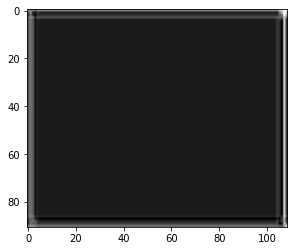

In [ ]:
pd.predictions_3D(train_y,predictions,0)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
def plot_residuals_3D(y_target,y_predicted,sample_number):
    y_p = y_predicted[sample_number]; 
    y = y_target.cpu().detach().numpy(); y_p = y_p.cpu().detach().numpy()
    frames = [] # for storing the generated images
    fig = plt.figure(); 
    for i in range(0,y.shape[4]):
        ## Appendin the plots
        frames.append([plt.imshow((y[sample_number][0,:,:,i]- y_p[0,:,:,i])**2, cmap=cm.Greys_r,animated=True)]);
    ani = animation.ArtistAnimation(fig, frames, interval=120, blit=True, repeat_delay=1000)
    ani.save('Residual.mp4');
# plot_residuals_3D(test_y,predictions,1)

from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Result.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)